### Import Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Players dataset

In [57]:
# Load players
players = pd.read_csv("players.csv")
players

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick
...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan


Feet to inches

In [58]:
# Convert feet to inches
def height_to_inches(h):
    if pd.isna(h): 
        return np.nan
    parts = str(h).split("-")
    if len(parts) != 2: 
        return np.nan
    feet, inches = parts
    return int(feet) * 12 + int(inches)

players = players.copy()
players["heightInches"] = players["height"].apply(height_to_inches)
players["weight"] = pd.to_numeric(players["weight"], errors="coerce")

print("Players loaded:", len(players))
players.head()


Players loaded: 1679


,nflId,height,weight,birthDate,collegeName,officialPosition,displayName,heightInches
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74


### Load PFF scouting

In [59]:
#load PFF scouting
pff = pd.read_csv("pffScoutingData.csv")
pff

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188249,2021110100,4433,52507,Pass Block,LT,NaN,NaN,NaN,0.0,0.0,1.0,0.0,43338.0,PP,0.0
188250,2021110100,4433,52546,Coverage,SCBoR,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188251,2021110100,4433,52573,Pass Route,SLoWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188252,2021110100,4433,52585,Pass Rush,LEO,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Normalize role text (and keep original too)
pff = pff.copy()
pff["pff_role_norm"] = pff["pff_role"].astype(str).str.strip().str.lower()

print("Unique pff_role values:", pff["pff_role"].unique())
print("Unique normalized roles:", pff["pff_role_norm"].unique())


Unique pff_role values: ['Pass' 'Pass Route' 'Pass Block' 'Pass Rush' 'Coverage']
Unique normalized roles: ['pass' 'pass route' 'pass block' 'pass rush' 'coverage']


In [61]:
pff.head(5)

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,pff_role_norm
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass route
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass route
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pass route
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0,pass block


### Merging player and pff

In [63]:
# Bring weight/position into PFF rows
pff_players = pff.merge(
    players[["nflId","weight","heightInches","officialPosition","displayName"]],
    on="nflId", how="left"
)

# Exact roles in this dataset are typically "Pass Block" and "Pass Rush"
# We'll select using both normalized and exact to be robust.
ol = pff_players[
    (pff_players["pff_role"].isin(["Pass Block"])) | 
    (pff_players["pff_role_norm"] == "pass block")
].copy()

dl = pff_players[
    (pff_players["pff_role"].isin(["Pass Rush"])) | 
    (pff_players["pff_role_norm"] == "pass rush")
].copy()

# Drop rows without weight for plotting
ol = ol[ol["weight"].notna()].copy()
dl = dl[dl["weight"].notna()].copy()

print(f"OL pass-block snaps: {len(ol):,}")
print(f"DL pass-rush snaps: {len(dl):,}")


OL pass-block snaps: 46,057
DL pass-rush snaps: 36,362


### Boxplot: OL vs DL weight distributions

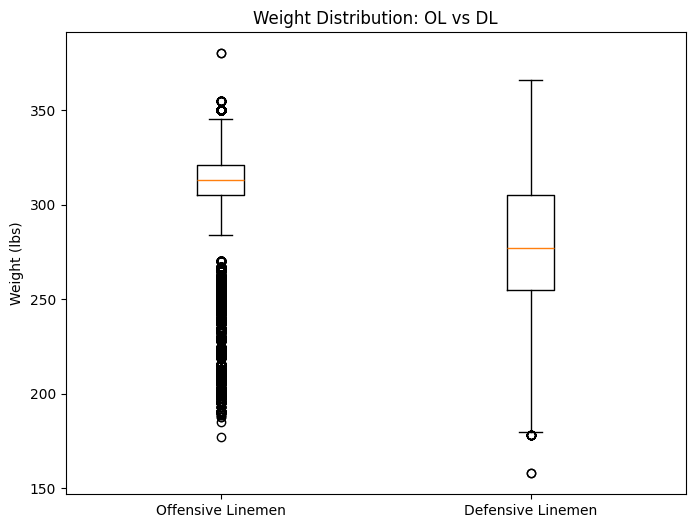

In [64]:
data = [ol["weight"].astype(float).dropna().values,
        dl["weight"].astype(float).dropna().values]

if len(data[0]) == 0 or len(data[1]) == 0:
    print("No data to plot. Check role strings above.")
else:
    plt.boxplot(data, tick_labels=["Offensive Linemen","Defensive Linemen"])
    plt.ylabel("Weight (lbs)")
    plt.title("Weight Distribution: OL vs DL")
    plt.show()


Observations:

Offensive linemen (OL) are heavier on averange than Defensive Linemen (DL)

### Distribution of weight and height by position

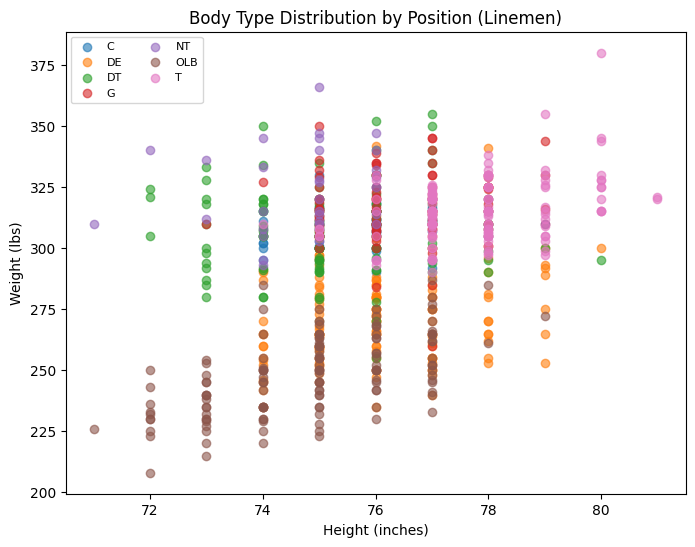

In [65]:
# Common line positions (adjust if you see others in your data)
line_positions = ["C","G","T","OG","OT","DT","DE","NT","EDGE","OLB"]

linemen = players[
    players["officialPosition"].isin(line_positions) &
    players["heightInches"].notna() &
    players["weight"].notna()
].copy()

if linemen.empty:
    print("No linemen with height/weight found. Check 'officialPosition' values.")
else:
    plt.figure()
    for pos, grp in linemen.groupby("officialPosition"):
        plt.scatter(grp["heightInches"], grp["weight"], alpha=0.6, label=pos)
    plt.xlabel("Height (inches)")
    plt.ylabel("Weight (lbs)")
    plt.title("Body Type Distribution by Position (Linemen)")
    plt.legend(ncol=2, fontsize=8)
    plt.show()


Observations:

- OL positions tend to be heavier and taller.
- DL are lighter, relying more on speed.

### Scatterplot Weight vs pressure allowed

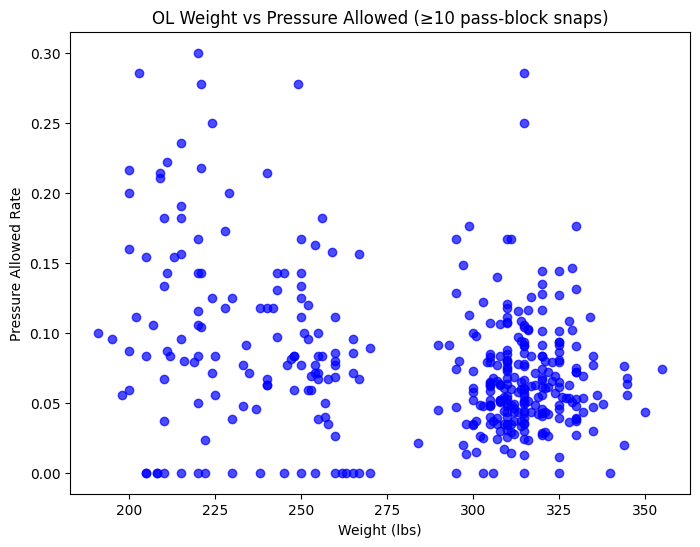

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(ol_perf["weight"], ol_perf["pressure_rate"], alpha=0.7, color="blue")
plt.xlabel("Weight (lbs)")
plt.ylabel("Pressure Allowed Rate")
plt.title("OL Weight vs Pressure Allowed (≥10 pass-block snaps)")
plt.show()


Observations:

Heavier offensive linemen tend to have lower pressure allowed rates. This suggest that their extra mass helps sustain blocks and keep the quarterback protected longer.

### Scatterplot DL wight vs pressure created

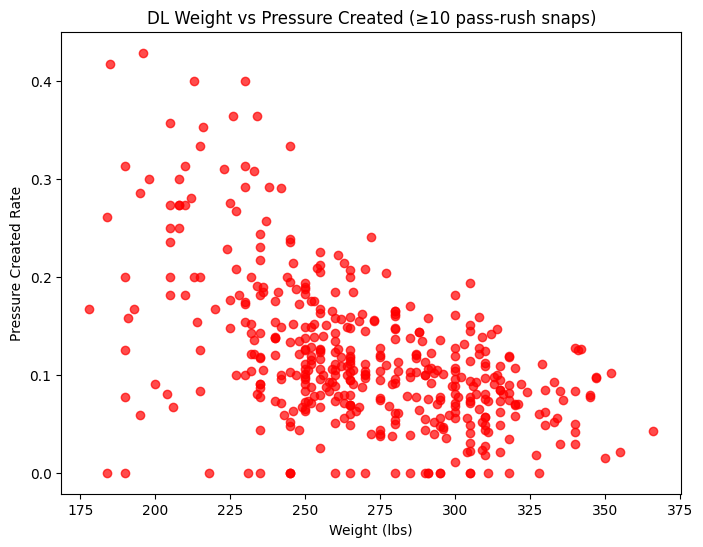

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(dl_perf["weight"], dl_perf["pressure_rate"], alpha=0.7, color="red")
plt.xlabel("Weight (lbs)")
plt.ylabel("Pressure Created Rate")
plt.title("DL Weight vs Pressure Created (≥10 pass-rush snaps)")
plt.show()


Observations:

Lighter defense lineman generate pressure at higher rates, highlighting how speed oriented build is more effective at rushing the passer.